## <p style="text-align: right;"> &#9989; Nic Wiggins </p>

You **NEED** to participate both individually and in groups in class to successfully complete this assignment and receive credits for it.

# In-Class Assignment: Inner Products

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Pleiades_large.jpg/1200px-Pleiades_large.jpg" width="50%">


<p style="text-align: right;">Image from: https://www.wikipedia.org/</p>
    

### Agenda for today's class (80 minutes)

</p>

1. (10 minutes) Function Approximation
1. (20 minutes) Fourier Transforms
1. (30 minutes) Least Squares Approximation
1. (20 minutes) Midterm 2 Review

---

# 1. Function Approximation (Recap)

**Definition:** Let $C[a,b]$ be a vector space of all possible continuous functions over the interval $[a,b]$ with inner product:
$$\langle f,g \rangle = \int_a^b f(x)g(x) dx.$$

Now let $f$ be an element of $C[a,b]$, and $W$ be a subspace of $C[a,b]$. The function $g \in W$ such that $\int_a^b \left[ f(x) - g(x) \right]^2 dx$ is a minimum is called the **least-squares approximation** to $f$.


 The least-squares approximation to $f$ in the subspace $W$ can be calculated as the projection of $f$ onto $W$:
 
 $$g = proj_Wf$$
 
 If $\{g_1, \ldots, g_n\}$ is an orthonormal basis for $W$, we can replace the dot product of $R^n$ by an inner product of the function space and get:
 
 $$prog_Wf = \langle f,g_1 \rangle g_1 + \ldots + \langle f,g_n \rangle g_n$$
 
This is assuming that g are all normalized. if not
 $$prog_Wf = \langle f,g_1 \rangle/\langle g_1,g_1 \rangle   g_1 + \ldots + \langle f,g_n \rangle/\langle g_n,g_n \rangle g_n$$
 
 
###  Polynomial Approximations

An orthogonal bases for all polynomials of degree less than or equal to $n$ can be computed using Gram-schmidt orthogonalization process.  First we start with the following standard basis vectors in $W$

$$ \{ 1, x, \ldots, x^n \}$$

The Gram-Schmidt process can be used to make these vectors orthogonal. The resulting polynomials on $[-1,1]$ are called  **Legendre polynomials**.  The first six Legendre polynomial basis are:

$$1$$
$$x$$
$$x^2 -\frac{1}{3}$$
$$x^3 - \frac{3}{5}x$$
$$x^4 - \frac{6}{7}x^2 + \frac{3}{35}$$
$$x^5 - \frac{10}{9}x^3 + \frac{5}{12}x$$

<font color=red>** QUESTION:**</font> What are the least-squares linear approximations of $f(x) = e^x$ over the interval $[-1, 1]$. In other words  the projection of $f$ onto $W$ where $W$ is a first order polynomal with basis vectors $\{1, x\} (i.e. $n=1$)$. (Hint: You give the answer in integrals without computing the integrals. Note the Legendre polynomials are not normalized.)

Put your answer to the above question here.

Here is a plot of the equation $f(x) = e^x$:

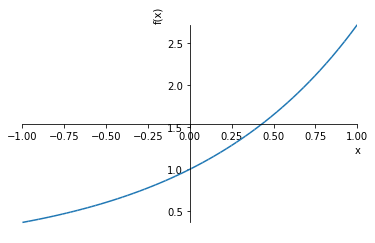

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np


#px = np.linspace(-1,1,100)
#py = np.exp(px)
#plt.plot(px,py, color='red');
import sympy as sym
from sympy.plotting import plot
x = sym.symbols('x')
f = sym.exp(x)
plot(f,(x,-1,1))

We can use **sympy** to compute the integral. The following code compute the definite integral of 
$$\int_{-1}^1 e^x dx.$$
In fact, **sympy** can also compute the indefinite integral by removing the interval.

In [2]:
sym.init_printing()
x = sym.symbols('x')
sym.integrate('exp(x)',(x, -1, 1))
# sym.integrate('exp(x)',(x))

Use **sympy** to compute the first order polynomial that approximates the function $e^x$.
The following calculates the above approximation written in ```Sympy```:

In [7]:
# Divide since this normalizes
f_0 = sym.integrate('exp(x)',(x, -1, 1))/sym.integrate('1',(x,-1,1))*1
f_1 = f_0 + sym.integrate('exp(x)*x',(x,-1,1))/sym.integrate('x*x',(x,-1,1))*x
f_1 

Plot the original function $f(x)=e^x$ and it's approximation.

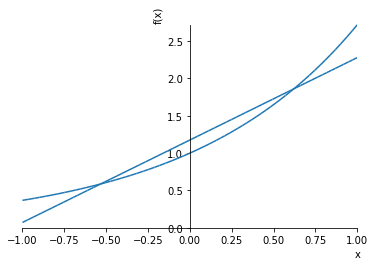

In [8]:
p2 = plot(f, f_1,(x,-1,1))

In [86]:
#For fun, I turned this into a function:
x = sym.symbols('x')

def lsf_poly(f, gb = [1,  x], a =-1, b=1):
    proj = 0
    for g in gb:
#        print(sym.integrate(g*f,(x,a,b)))
        proj = proj + sym.integrate(g*f,(x,a,b))/sym.integrate(g*g,(x,a,b))*g
    return proj

lsf_poly(sym.exp(x))

<font color=red>** QUESTION:**</font> What would a second order approximation look like for this function?

In [14]:
# Divide since this normalizes
f_0 = sym.integrate('exp(x)',(x, -1, 1))/sym.integrate('1',(x,-1,1))*1
f_1 = f_0 + sym.integrate('exp(x)*x',(x,-1,1))/sym.integrate('x*x',(x,-1,1))*x
f_2 = f_1 + sym.integrate('exp(x)*(x**2-1/3)',(x,-1,1))/sym.integrate('(x**2-1/3)**2',(x,-1,1))*(x**2-1/3)
f_2

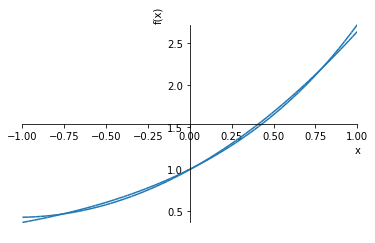

In [15]:
p2 = plot(f, f_2,(x,-1,1))

In [109]:
#For fun, I turned this into a function:
x = sym.symbols('x')
f = sym.exp(x)

l = [1,  x,x**2-1/3, x**3 - 3/5*x]
f_3 = lsf_poly(sym.exp(x),l,-1,1)
f_3

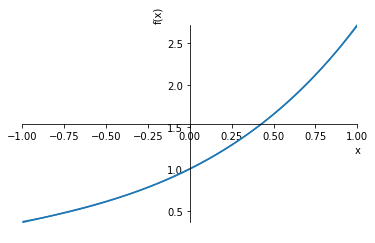

In [110]:
p2 = plot(f, f_3,(x,-1,1))

# 2. Fourier Approximations

Now, we consider the trigonometric polynomials spanned by the set $\{ 1, \cos x, \sin x, \ldots \cos nx, \sin nx\}$ over $[-\pi,\pi]$, where $n$ is a positive integer. 
It can be shown that these vectors are already orthogonal and thus form a basis. 
If we divide the vectors by their magnitudes, we get the following orthonormal basis:

$$\{g_0, \ldots, g_2n\} = \left\{ \frac{1}{\sqrt{2\pi}}, \frac{1}{\sqrt{\pi}} \cos{x}, \frac{1}{\sqrt{\pi}} \sin{x}, \ldots, \frac{1}{\sqrt{\pi}}\cos{nx}, \frac{1}{\sqrt{\pi}} \sin{nx} \right\}$$

If we project function $f$ onto this basis, we get the following trigonometric approximation:

$$g(x) = a_0 + \sum_{k=1}^n \left( a_k \cos{kx} + b_k \sin{kx} \right) $$

where the coefficients $a_0,a_1,b_1, \ldots, a_n,b_n$ are defined as:

$$a_0 = \langle {f, \frac{1}{\sqrt{2\pi}}} \rangle \frac{1}{\sqrt{2\pi}} = \frac{1}{{2\pi}} \int_{-\pi}^{\pi} f(x) dx$$

$$a_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \cos{kx} dx$$

$$b_k = \frac{1}{\pi} \int_{-\pi}^{\pi} f(x) \sin{kx} dx$$

The above set of equations is know as the Fourier series. Using the Fourier series we can approximate any functions with sin's and cos's.

In **Example 2** of section 6.3 of the textbook, we see that the Fourier approximation to $f(x) = x$ over the interval $\left[ -\pi, \pi \right]$ is:

$$ g(x) = \sum_{k=1}^{n} \frac{2(-1)^{k+1}}{k} \sin{kx}$$

Taking $n = 4$ we get the forth-order approximation:

$$g(x) = 2\left(\sin x - \frac{1}{2} \sin{2x} + \frac{1}{3} \sin{3x} - \frac{1}{4} \sin{4x}\right)$$

<font color=red>**QUESTION:**</font> Find the fourth-order Fourier approximations to $f(x) = 1+x$ over $[-\pi,\pi]$.


In [93]:
def getGList(n):
    x = sym.symbols('x')
    l = []
    for i in range(n):
        if i == 0:
            val = 1
        elif i % 2 == 1:
            val = sym.cos((i+1)/2*x)
        else:
            val = sym.sin((i/2)*x)
        l.append(val)
    return l


In [94]:
getGList(4)

In [99]:
#For fun, I turned this into a function:
x = sym.symbols('x')
n = 4
f = x+1
F4 = lsf_poly(f,getGList(n), -sym.pi, sym.pi)
F4

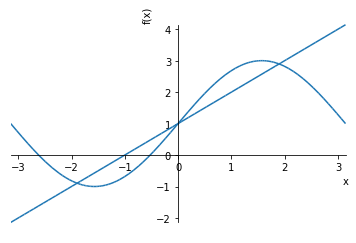

In [100]:
plot(x+1, F4,(x,-sym.pi,sym.pi))

In [101]:
#For fun, I turned this into a function:
x = sym.symbols('x')
n = 10
f = x**2
F4 = lsf_poly(f,getGList(n), -sym.pi, sym.pi)
F4

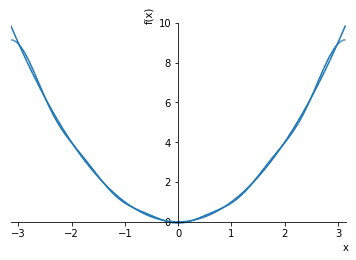

In [102]:
plot(x**2, F4,(x,-sym.pi,sym.pi))

<font color=red>**DO THIS:**</font> Visualize the fourth order approximation of $f(x)=x$. Then **modify the code** to visualize the fourth-order approximation of $f(x)=x^2$.

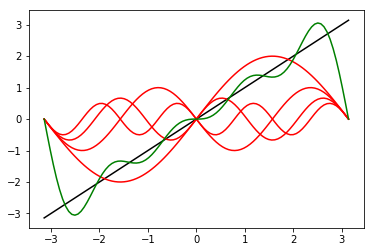

In [75]:
x = np.linspace(-np.pi,np.pi,100)
y = x
g1 = 2*np.sin(x)
g2 = -np.sin(2*x)
g3 = 2*np.sin(3*x)/3
g4 = -2*np.sin(4*x)/4
gg = g1+g2+g3+g4
plt.plot(x,y, color='black')
plt.plot(x,g1, color='red')
plt.plot(x,g2, color='red')
plt.plot(x,g3, color='red')
plt.plot(x,g4, color='red')
plt.plot(x,gg, color='green')

Let's look at the approximation with different orders from 1 to 4.

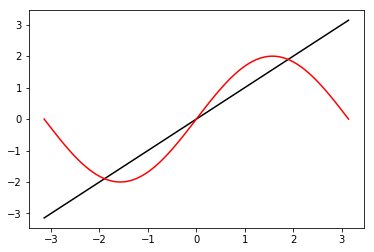

In [76]:
# First-order
plt.plot(x,y, color='black')
plt.plot(x,g1, color='red')

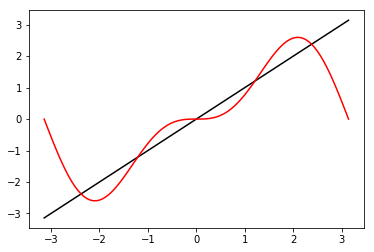

In [77]:
# Second-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2, color='red')

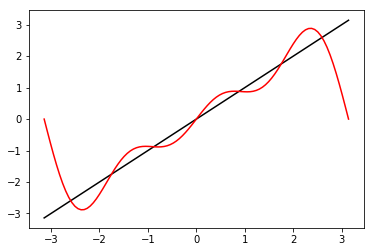

In [78]:
# Third-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2+g3, color='red')

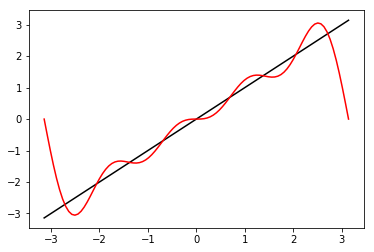

In [79]:
# Fourth-order
plt.plot(x,y, color='black')
plt.plot(x,g1+g2+g3+g4, color='red')

# 3. Least Squares Approximation

Let's consider vectors in $R^n$ for simplicity, though this can be generalized to inner product spaces.
Let $\{g_1,\cdots,g_r\}$ be an orthonormal basis of a subspace $V$, then the best approximation of $f$ with a point in the subspace $V$ can be explained as an optimization problem 
$$\min_x~\|f-A x\|,$$
where $A=[g_1,\cdots,g_r]$ (The columns of $A$ are the orthonormal basis). 

We know that the optimal result is just the inner product of $f$ and the vectors in the orthonormal basis. That is
$$x_1 = \langle f, g_1\rangle = g_1^\top f\\
x_2 = \langle f, g_2 \rangle = g_2^\top f\\
\vdots\\
x_r = \langle f, g_r\rangle = g_r^\top f.$$

We know that 
$$A^\top = \begin{bmatrix}g_1^\top \\ g_2^\top \\ \vdots\\ g_r^\top\end{bmatrix},$$
thus we have 
$$x= A^\top f.$$

###  What if the columns of $A$ are not orthonormal? 
We still assume that columns of $A$ are linear independent, but they are not orthonormal. 
Then we have have apply the Gram-Schmidt and have the decomposition 
$$A = QR,$$
where $Q$ is a $n\times r$ matrix whose columns are orthonormal and $R$ is a $r\times r$ upper triangular matrix.  
Then the optimization problem becomes 
$$\min_x \| f-Ax\|= \min_x \|f-QRx\|.$$
Because the columns of $Q$ is orthogonal, we let $y=Rx$ and we can find 
$$Rx= y = Q^\top f.$$
Therefore, we have 
$$x = R^{-1} Q^\top f = R^{-1}R^{-\top} R^\top Q^\top f = (R^\top R)^{-1} A^\top f = (R^\top Q^\top Q R)^{-1}A^\top f = (A^\top A)^{-1} A^\top f.$$

### The generalization to the inner product space.
Let's go back to the general inner product space. In this case, the columns of $A$ are vectors in $R^n$. They are points in the inner produce space, e.g., it can be a continuous function on $[-1,1]$. 

Assume that we are given a basis $\{h_1,\cdots, h_r\}$
Instead of finding the orthonormal basis first and compute the coefficients, we can directly solve the coefficients by the following three steps. 
> **Step 1:** Compute 
$$A^\top f = \begin{bmatrix}\langle h_1,f\rangle  \\
\langle h_2,f\rangle \\
\vdots \\
\langle h_r,f\rangle
\end{bmatrix}$$
> **Step 2:** Computer 
$$A^\top A = \begin{bmatrix}\langle h_1,h_1\rangle & \langle h_1,h_2\rangle & \cdots &  \langle h_1,h_r\rangle \\
\langle h_2,h_1\rangle & \langle h_2,h_2\rangle & \cdots &  \langle h_2,h_r\rangle \\
&& \vdots & \\
\langle h_r,h_1\rangle & \langle h_r,h_2\rangle & \cdots &  \langle h_r,h_r\rangle 
\end{bmatrix}$$
> **Step 3:** Solve for $x$, such that 
$$(A^\top A) x = A^\top f$$


<font color=red>**DO THIS:**</font> Let's redo the polynomial approximation problem using this new method. We want to approximate $f(x)=e^x$ using a polynomial of degree upto two. Assume that we are given the standard basis $\{1,x,x^2\}$.

<font color=red>**STEP ONE:**</font> Compute $A^\top f$

In [118]:
#####Start your code here #####
x = sym.symbols('x')
b = [1,x,x**2]
f = sym.exp(x)
Atf = []
for h in b:
    Atf.append(sym.integrate(h*f,(x,-1,1)))

Atf = sym.Matrix(Atf)
Atf           
#####End of your code here#####

⎡    -1     ⎤
⎢ - ℯ   + ℯ ⎥
⎢           ⎥
⎢      -1   ⎥
⎢   2⋅ℯ     ⎥
⎢           ⎥
⎢     -1    ⎥
⎣- 5⋅ℯ   + ℯ⎦

<font color=red>**STEP TWO:**</font> Compute $A^\top A$

In [119]:
#####Start your code here #####
AtA = []

for ha in b:
    l = []
    for hb in b:
        l.append(sym.integrate(ha*hb,(x,-1,1)))
    AtA.append(l)
    
AtA = sym.Matrix(AtA)
AtA
#####End of your code here#####

⎡ 2    0   2/3⎤
⎢             ⎥
⎢ 0   2/3   0 ⎥
⎢             ⎥
⎣2/3   0   2/5⎦

<font color=red>**STEP THREE:**</font> Solve $(A^\top A)x = A^\top f$ for $x$

In [121]:
#####Start your code here #####


Co = AtA.LUsolve(Atf)
Co
#####End of your code here#####

⎡             -1 ⎤
⎢   3⋅ℯ   33⋅ℯ   ⎥
⎢ - ─── + ────── ⎥
⎢    4      4    ⎥
⎢                ⎥
⎢        -1      ⎥
⎢     3⋅ℯ        ⎥
⎢                ⎥
⎢       -1       ⎥
⎢  105⋅ℯ     15⋅ℯ⎥
⎢- ─────── + ────⎥
⎣     4       4  ⎦

<font color=red>**DO THIS:**</font> Compare with the previous result.

In [125]:
#####Start your code here #####

g_2b = Co[0] + Co[1]*x + Co[2]*x**2 # The approximation obtained in this new way.
g_2b
#####End of your code here#####

In [127]:
f_2

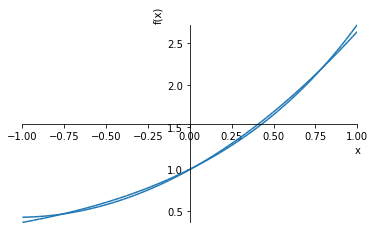

In [124]:
plot(sym.exp(x), g_2b,(x,-1,1))

# 4. Midterm 4 Review

[Midterm-Exam2_SS19](Midterm-Exam2_SS19.ipynb)

-----
### Congratulations, we're almost done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).


&#169; Copyright 2018,  Michigan State University Board of Trustees